# The Importance of Handwashing

Dr. Ignaz Semmelweis was an Hungarian physician born in 1818 and worked at the Vienna General Hospital in Austria. 

In the early 1840's, as many as 10% of the women giving birth were dying from 'childbed fever'.
The doctors and medical students' wards (clinic 1 in the data) had three times the mortality compared to midwives' wards (clinic 2).

In this project I will explore data from the 1800s that made Dr Semmelweis realise something wasn't right with the procedures at the Vienna General Hospital's Obstetrics ward.

He published a book on his findings.

Data source: Datacamp.com
Information from wikipedia.org and Datacamp.com

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly.deaths / yearly.births

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out clinic_1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


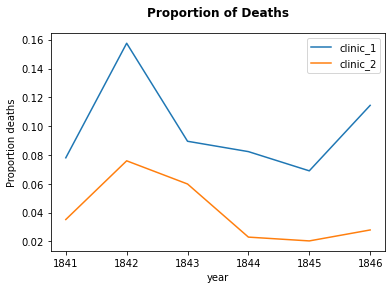

In [5]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x='year', y='proportion_deaths', label='clinic_1')
clinic_2.plot(x='year', y='proportion_deaths', label='clinic_2', ax=ax, ylabel='Proportion deaths')
plt.title('Proportion of Deaths', fontweight='bold', y=1.05)
plt.show()


In the graph above, we can see the huge difference in mortality in the two clinics at the Vienna General Hospital.
Clinic 1 - which was the doctors and medical students wards (the medical students worked on corpses with their bare hands!).
Clinic 2 - where the midwives delivered the babies.

Dr Semmelweis began to suspect something on the doctors' hands was contributing to the death of the mothers. In 1847, he suggested the practice of washing hands with chlorinated lime solutions.

In [6]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly.deaths / monthly.births

# Print out the first rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


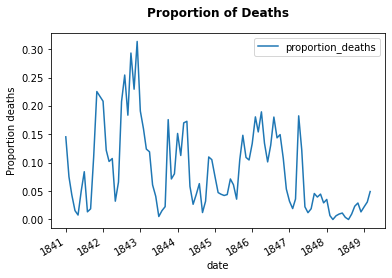

In [8]:
# Plot monthly proportion of deaths with handwashing data included
ax = monthly.plot(x='date', y='proportion_deaths', ylabel='Proportion deaths')
plt.title('Proportion of Deaths', fontweight='bold', y=1.05)
plt.show()

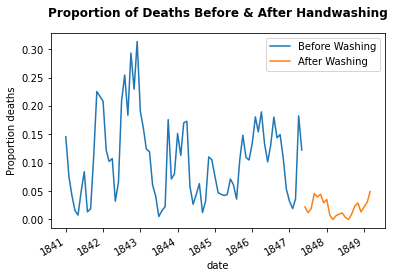

In [11]:
# Showing difference between pre-handwashing and post-handwashing

# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before Washing')
after_washing.plot(x='date', y='proportion_deaths', label='After Washing', ax=ax, ylabel='Proportion deaths')
plt.title('Proportion of Deaths Before & After Handwashing', fontweight='bold', y=1.05)
plt.show()

This graph highlights the significant decrease in mortality after handwashing.

In [12]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

There is an over 8% decrease in deaths after handwashing started!

Sadly Dr Semmelweis' findings were accepted only years after his death. Louis Pasteur confirmed the germ theory, giving Dr Semmelweis' observations a scientific explanation.